#### Predicting home price in Monroe, New Jersey (USA)

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age:

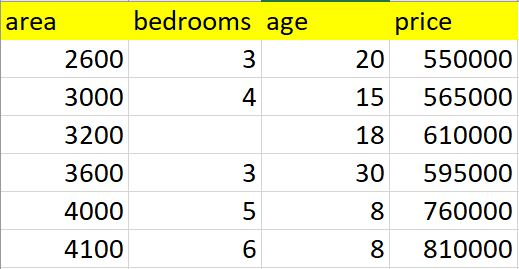

Given these home prices, let's find out price of a home that has the follwing features:

3000 sqr ft area, 3 bedrooms, 40 year old

2500 sqr ft area, 4 bedrooms, 5 year old

We will use regression with multiple variables here. Price can be calculated using following equation:

###### 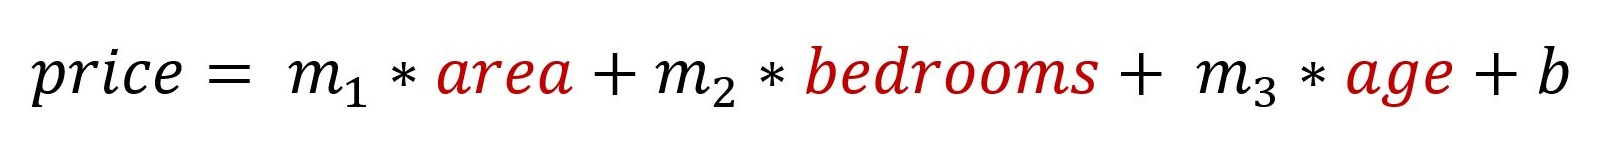

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport

In [6]:
file = pd.read_csv("/Users/yudiudyan/Desktop/iNeuron/Code Basics - Entire GitHub Clone/ML/2_linear_reg_multivariate/homeprices.csv")
file

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
file.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


Since there is not a lot of data in the dataset, we can ignore generating a Profile Report and observe the following dataset from the description above:

1. The is one missing value in the 'bedrooms' columns.

2. Multicollinearity exists between the columns (since if we change one of the values, it will have an effect on the price of the house.)

filling the missing values using the median function:

In [8]:
for i in file:
    if file[i].isna().sum() != 0:
        file[i] = file[i].fillna(file[i].median())
file

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [11]:
lin_reg = LinearRegression()
x = file.drop(columns=['price'])
y = file.price
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [12]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [13]:
lin_reg.fit(x,y)

LinearRegression()

In [14]:
lin_reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [15]:
lin_reg.intercept_

221323.00186540408

##### Finding the price of home with 3000 sqr ft area, 3 bedrooms and 40 year old:

In [18]:
lin_reg.predict([[3000,3,40]])

array([498408.25158031])

The price is around 498,408$

##### Finding the price of home with 2500 sqr ft area, 4 bedrooms, 5 year old:

In [20]:
lin_reg.predict([[2500,4,5]])

array([578876.03748933])

The price is around 578,876$

##### Making a user input function that will take the input from the user for the features and then predict the price for the house:

In [40]:
area, bedroom, age = input("Enter the area, no. of bedrooms and the age of the customerseperated by a comma - ").split(",")  
area, bedroom, age = int(area), int(bedroom), int(age)
predicted_price = lin_reg.predict([[area,bedroom,age]])
x = int(np.round(predicted_price,2))
print("The house of "+str(area)+"sqft. of "+str(bedroom)+" bedroom(s) and age "+str(age)+" is:"+str(x)+"$") 

Enter the area, no. of bedrooms and the age of the customerseperated by a comma - 2520,4,5
The house of 2520sqft. of 4 bedroom(s) and age 5 is:581117$
